About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bike_sharing.txt')
df.head(8)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3


Column Profiling (For better understanding of dataset)

season: season (1: spring, 2: summer, 3: fall, 4: winter)

holiday: whether day is a holiday or not

workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

weather:

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: temperature in Celsius

atemp: feeling temperature in Celsius

humidity: humidity

windspeed: wind speed

casual: count of casual users

registered: count of registered users

count: count of total rental bikes including both casual and registered

In [3]:
# Checking column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
# Changing data type of 'datetime' column and creating one new column Hour from it 
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [5]:
# Checking shape of dataset
df.shape

(10886, 13)

In [6]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000


<AxesSubplot:>

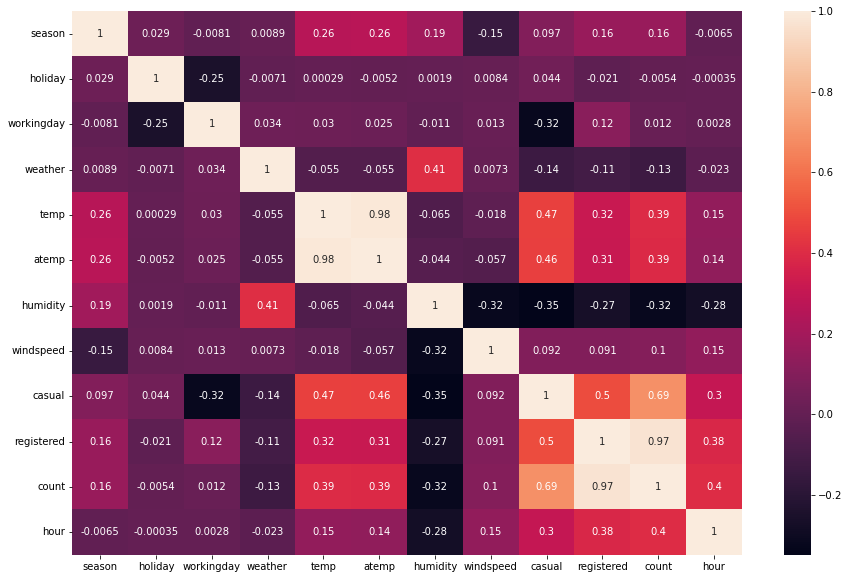

In [7]:
# checking correlation between dependent and independent variable 
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True)

Text(0.5, 1.0, 'Count of Total riders on various season')

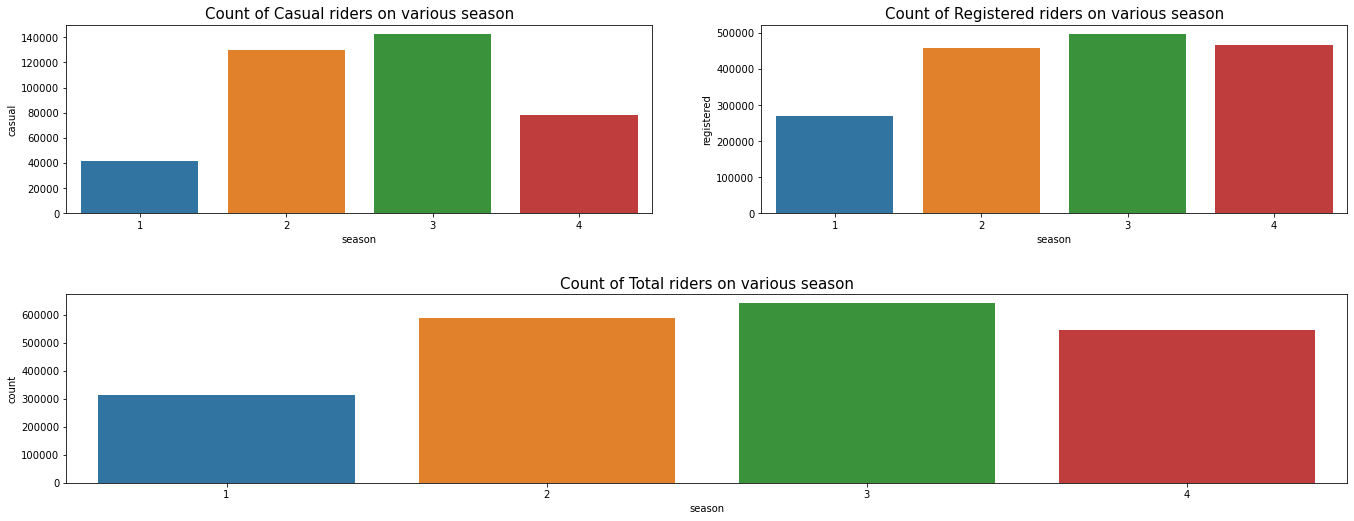

In [8]:
# Exploring relation between season and count(Bivariate analysis)
s_c  =  df.groupby('season')['count'].sum().reset_index()
s_ca = df.groupby('season')['casual'].sum().reset_index()
s_r  = df.groupby('season')['registered'].sum().reset_index()
s_c.rename({'count':'Total'}, inplace = True)

fig = plt.figure(figsize = (20,8))
plt.subplot(2,2,1)
sns.barplot(x = s_ca['season'], y = s_ca['casual'])
plt.title('Count of Casual riders on various season', fontsize = 15)

plt.subplot(2,2,2)
sns.barplot(x = s_r['season'], y = s_r['registered'])
plt.title('Count of Registered riders on various season', fontsize = 15)

fig.tight_layout(pad = 5.0)
plt.subplot(2,1,2)
sns.barplot(x = s_c['season'], y = s_c['count'])
plt.title('Count of Total riders on various season', fontsize = 15)

### From above graphs it can be inferred that season has impact on number of rides season 2:Summer , 3:Fall has more rides 

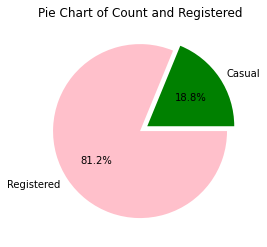

In [9]:
# Comparision between Count of Casual user vs registered users 
x = df['casual'].sum()
y = df['registered'].sum()

# create the data and labels for the pie chart
sizes = [x, y]
labels = ['Casual', 'Registered']

# specify the colors and explode the first slice
colors = ['green', 'pink']
explode = (0.1, 0)

# create the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%')

# add a title
ax.set_title('Pie Chart of Count and Registered')

# show the plot
plt.show()

Text(0.5, 1.0, 'Count of Total riders ')

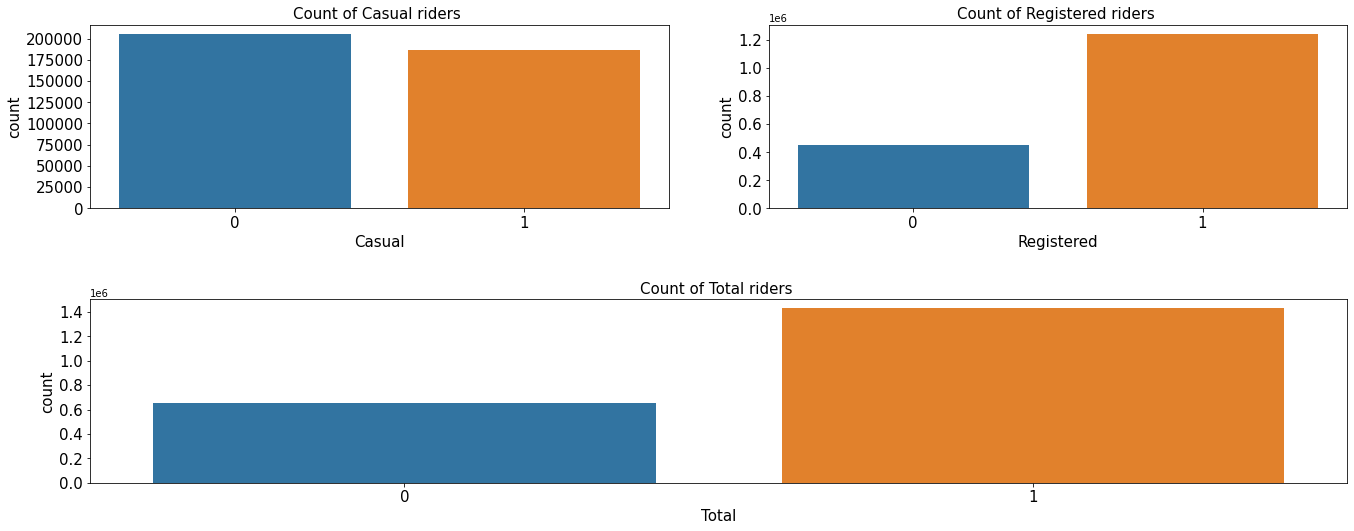

In [10]:
# Exploring relation between working days and count(Bivariate analysis)
w_c  =  df.groupby('workingday')['count'].sum().reset_index()
w_ca = df.groupby('workingday')['casual'].sum().reset_index()
w_r  = df.groupby('workingday')['registered'].sum().reset_index()
w_c.rename({'count':'Total'}, inplace = True)

fig = plt.figure(figsize = (20,8))
plt.subplot(2,2,1)
sns.barplot(x = w_ca['workingday'], y = w_ca['casual'])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Casual', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.title('Count of Casual riders ', fontsize = 15)

plt.subplot(2,2,2)
sns.barplot(x = w_r['workingday'], y = w_r['registered'])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Registered', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.title('Count of Registered riders ', fontsize = 15)

fig.tight_layout(pad = 5.0)
plt.subplot(2,1,2)
sns.barplot(x = w_c['workingday'], y = w_c['count'])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Total', fontsize = 15)
plt.ylabel('count',fontsize = 15)
plt.title('Count of Total riders ', fontsize = 15)

### From above graph it can be inferred that working day has impact on number of rides on working days Registered users are more while on weekends or holidays Casual rides has surpassed the registered users 

Text(0.5, 1.0, 'Count of Total riders on various weather conditions')

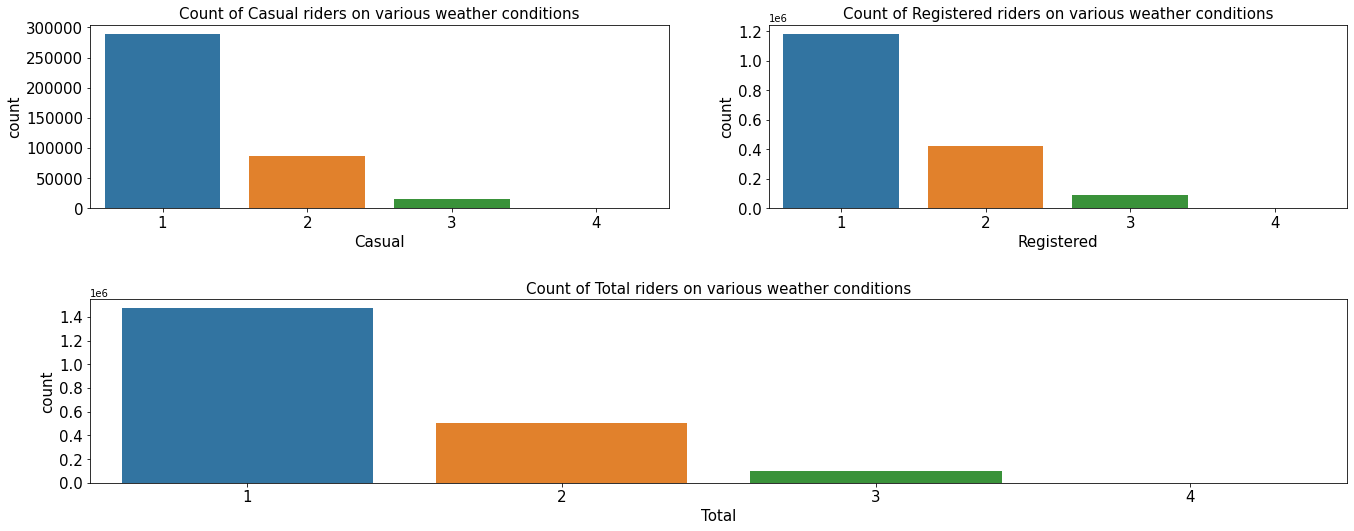

In [14]:
# Exploring relation between weather and count(Bivariate analysis)
we_c  =  df.groupby('weather')['count'].sum().reset_index()
we_ca = df.groupby('weather')['casual'].sum().reset_index()
we_r  = df.groupby('weather')['registered'].sum().reset_index()
we_c.rename({'count':'Total'}, inplace = True)

fig = plt.figure(figsize = (20,8))
plt.subplot(2,2,1)
sns.barplot(x = we_ca['weather'], y = we_ca['casual'])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Casual', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.title('Count of Casual riders on various weather conditions', fontsize = 15)

plt.subplot(2,2,2)
sns.barplot(x = we_r['weather'], y = we_r['registered'])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Registered', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.title('Count of Registered riders on various weather conditions', fontsize = 15)

fig.tight_layout(pad = 5.0)
plt.subplot(2,1,2)
sns.barplot(x = we_c['weather'], y = we_c['count'])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Total', fontsize = 15)
plt.ylabel('count',fontsize = 15)
plt.title('Count of Total riders on various weather conditions', fontsize = 15)


### from above graph we can infer that weather has impact on number of rides be it casual or registered 
1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

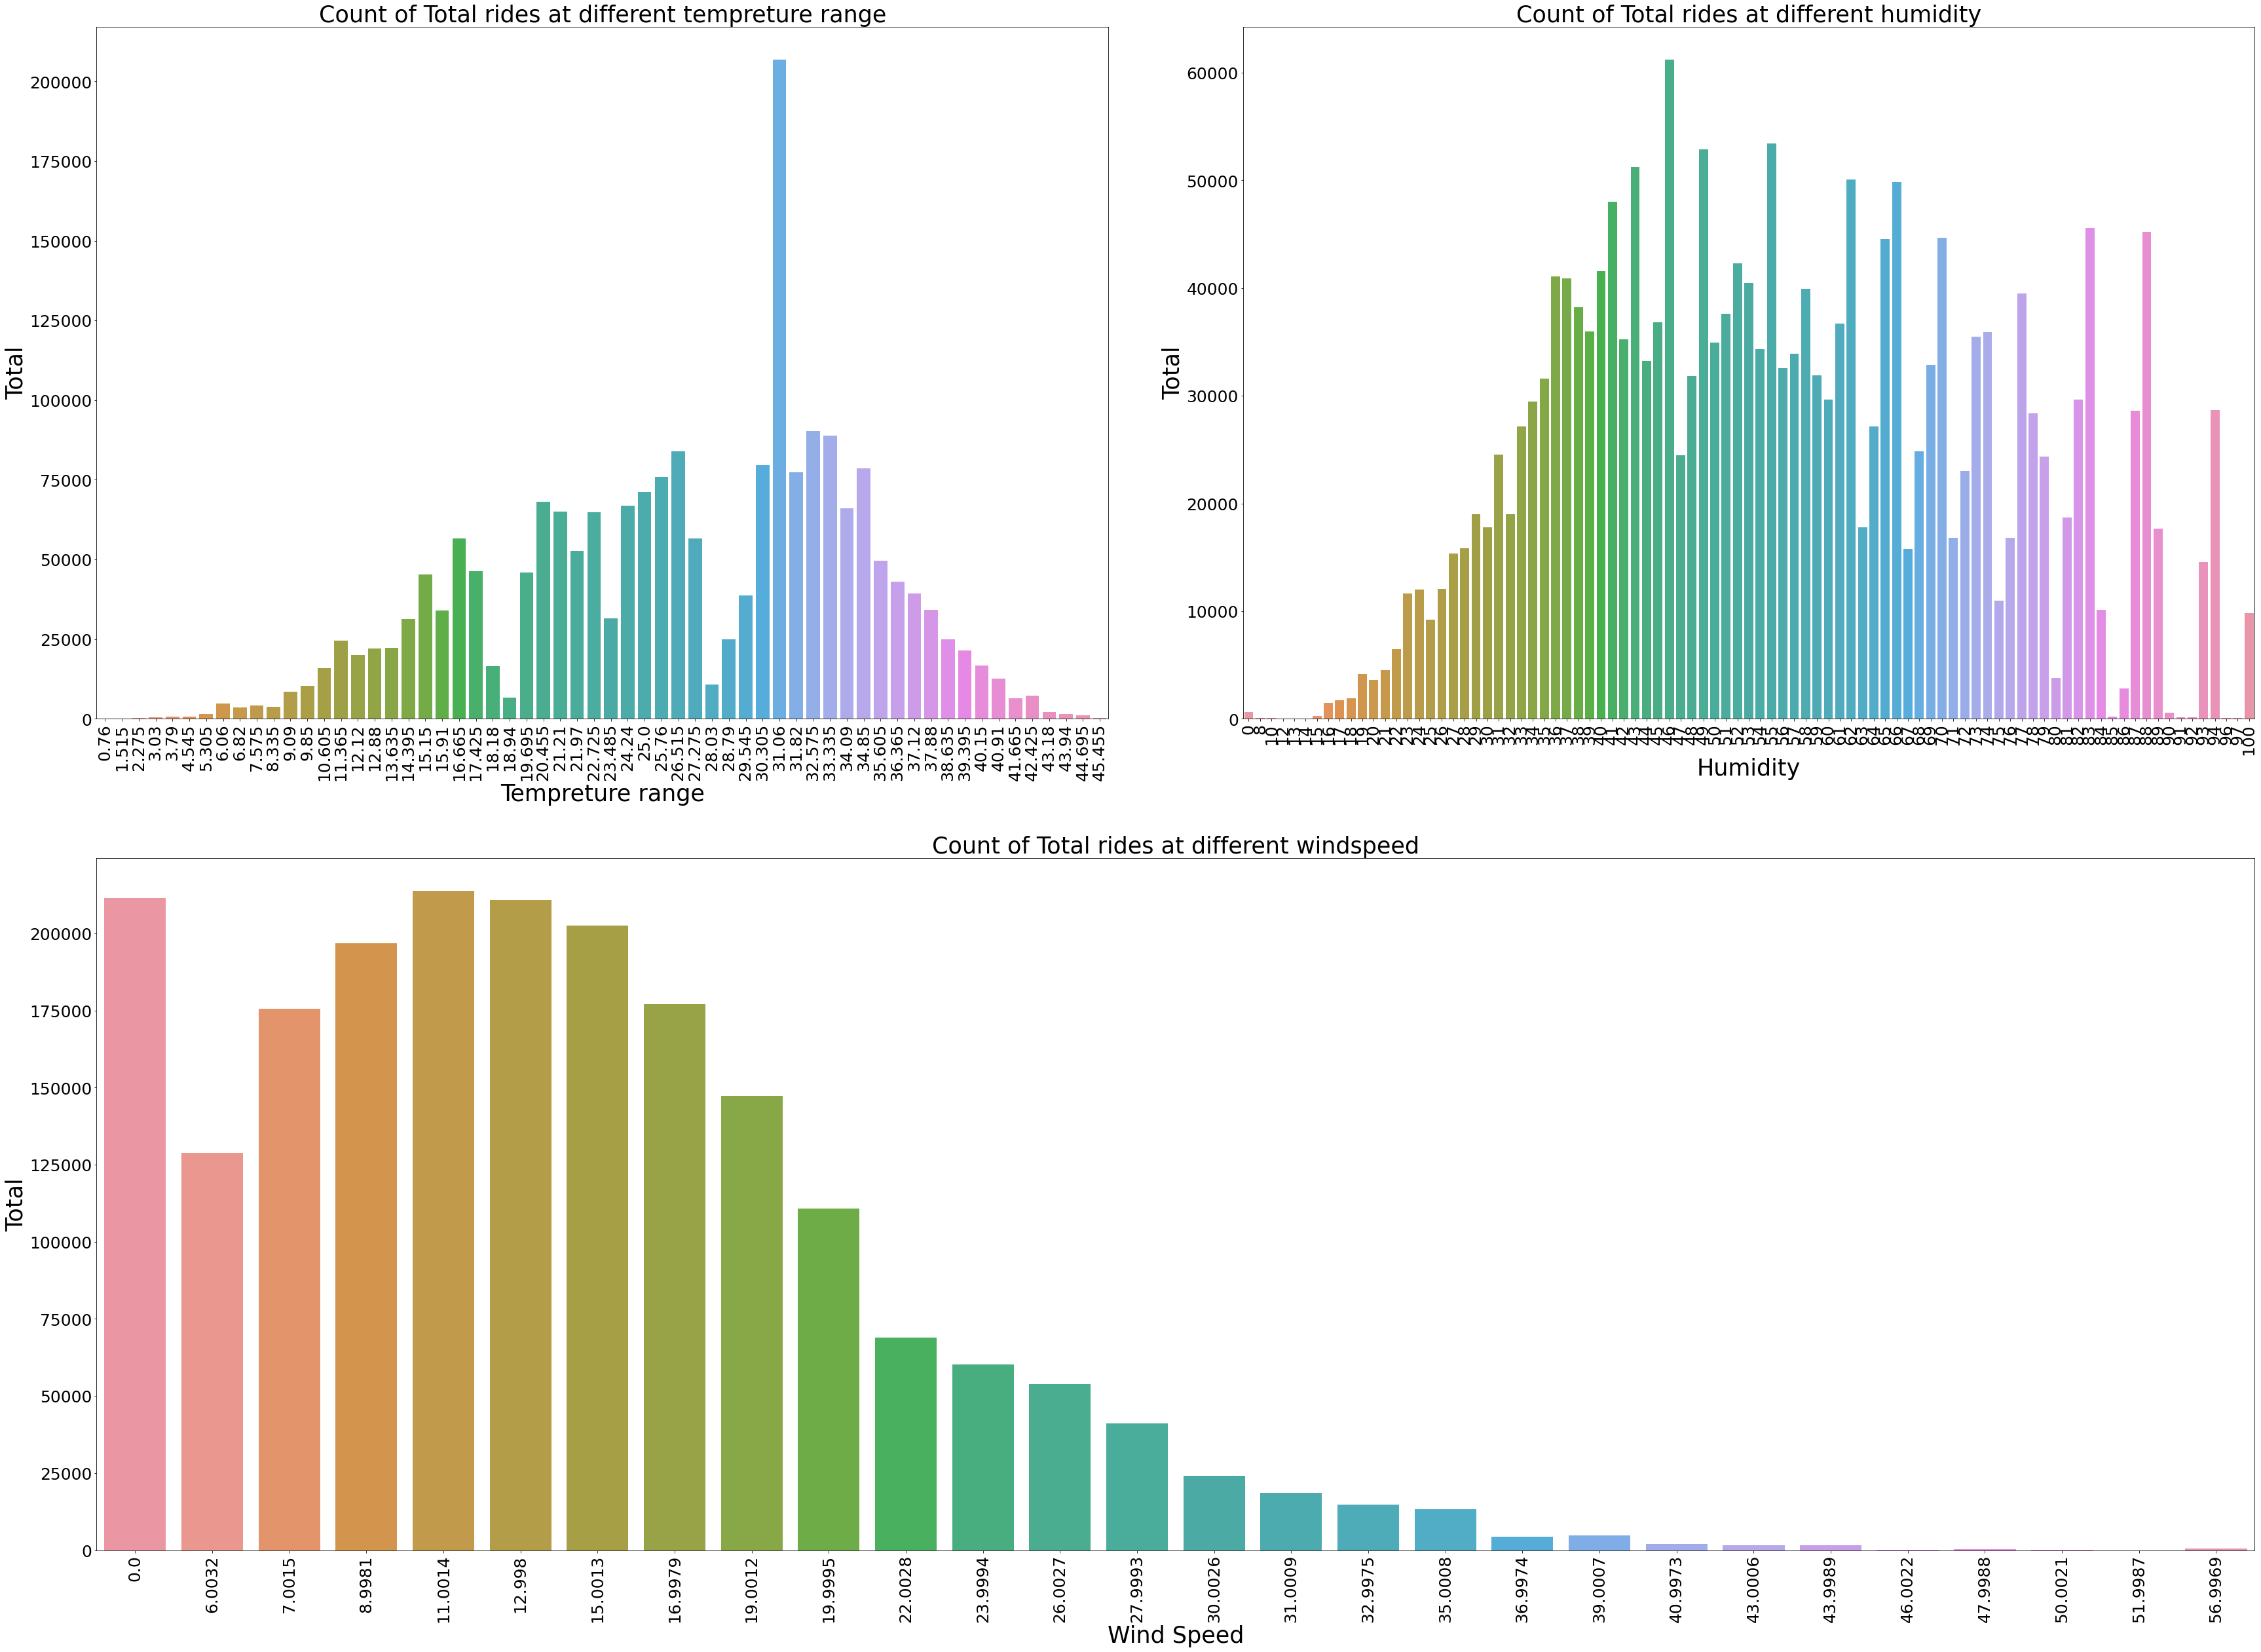

In [45]:
# Exploring relation between Total ride count vs Humidity, Total ride count vs Wind Speed, Total ride count vs Tempreture range 
t_c = df.groupby('atemp')['count'].sum().reset_index()
t_c.rename({'count':'Total','atemp':'Tempreture range'},axis =1, inplace = True)

wh_c = df.groupby('windspeed')['count'].sum().reset_index()
wh_c.rename({'count':'Total'},axis =1, inplace = True)

h_c = df.groupby('humidity')['count'].sum().reset_index()
h_c.rename({'count':'Total'},axis =1, inplace = True)

fig = plt.figure(figsize = (50,35))
plt.subplot(2,2,1)
sns.barplot(x = t_c['Tempreture range'], y = t_c['Total'])
plt.title('Count of Total rides at different tempreture range', fontsize = 35)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Tempreture range',fontsize = 35)
plt.ylabel('Total', fontsize = 35)
plt.xticks(rotation = 90);

plt.subplot(2,2,2)
sns.barplot(x = h_c['humidity'], y = h_c['Total'])
plt.title('Count of Total rides at different humidity', fontsize = 35)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Humidity',fontsize = 35)
plt.ylabel('Total', fontsize = 35)
plt.xticks(rotation = 90);

fig.tight_layout(pad = 8.0)
plt.subplot(2,1,2)
sns.barplot(x = wh_c['windspeed'], y = wh_c['Total'])
plt.title('Count of Total rides at different windspeed', fontsize = 35)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Wind Speed',fontsize = 35)
plt.ylabel('Total', fontsize = 35)
plt.xticks(rotation = 90);

### From above graphs we get following insights 
1. Number of rides depends upon tempreture on very cold or very hot days rides are less in number while on good sunny days an increase can be observed
2. Number of rides depends upon Humidity it is visible that on less humid days rides taken is less and same can be said for extremly high humid days but in between extremes rides are taken in significant numbers 
3. Number of rides depends upon Windspped when wind is below 20 rides are in good numbers and above 20 significant decline is observed

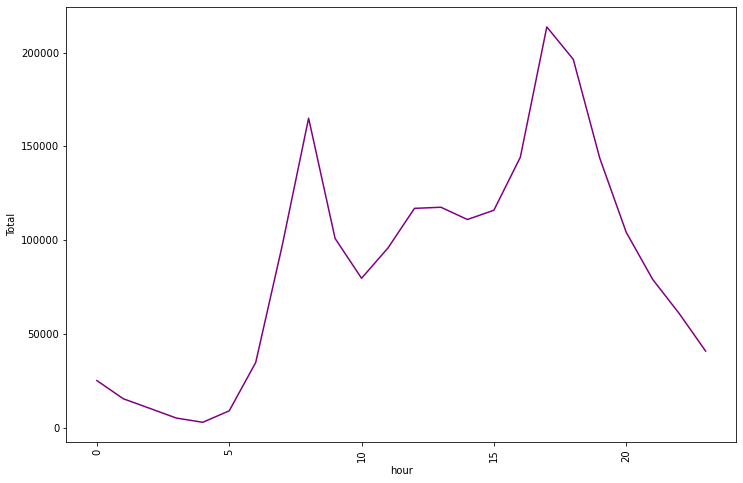

In [52]:
g_c = df.groupby('hour')['count'].sum().reset_index()
g_c.rename({'count':'Total'},axis =1, inplace = True)
plt.figure(figsize = (12,8))
sns.lineplot(x = g_c['hour'], y = g_c['Total'], color = 'purple')
plt.xticks(rotation = 90);

### From above graph following observations can be taken 
1. Peak hour are from morning 5AM to evening 8PM 
2. around 8AM and 6PM have the most rides as these are office timings 

### Till now we have visulally seen what is trend and how is number of rides changing with various condition but now we will see are these visuals statistically significant we will try to find answers of below questions using statistics 
#### 1. Working Day has effect on number of electric cycles rented
#### 2. No. of cycles rented similar or different in different seasons
#### 3. No. of cycles rented similar or different in different weather
#### 4. Weather is dependent on season (check between 2 predictor variable)

In [66]:
# Check working day has any impact on number of electric cycles rented or not (Checking at 95% confidence or alpha = 0.05) 
# using two sample t-test
 
# Null Hypothesis: H0 is working day has no impact on number of electric cycles rented
# Alternate Hypothesis: Ha is working day has impact on number of electric cycles rented

import scipy.stats as stat
alpha = 0.05
workingday_count = df[df['workingday'] == 1]['count'].values
non_workingday_count = df[df['workingday'] == 0]['count'].values

t_stat,p_value = stat.ttest_ind(workingday_count, non_workingday_count)
print('p_value is',p_value)
if p_value < alpha:
    print('we reject Null Hypothesis H0')
else:
    print('Failed to reject Null Hypothesis H0')

p_value is 0.22644804226361348
Failed to reject Null Hypothesis H0


### so as p_value is very high so we can say that working day has no impact on number of electric cycles rented

In [68]:
# Check season has any impact on number of electric cycles rented or not (Checking at 95% confidence or alpha = 0.05)
# using Anova

# Null Hypothesis: H0 is Season has no impact on number of electric cycles rented
# Alternate Hypothesis: Ha is Season has impact on number of electric cycles rented

from scipy.stats import f_oneway
season_count_1 = df[df['season'] == 1]['count'].values
season_count_2 = df[df['season'] == 2]['count'].values
season_count_3 = df[df['season'] == 3]['count'].values
season_count_4 = df[df['season'] == 4]['count'].values

alpha = 0.05
f_stat,p_value = f_oneway(season_count_1,season_count_2,season_count_3,season_count_4)
print('p_value is',p_value)
if p_value < alpha:
    print('we reject Null Hypothesis H0')
else:
    print('Failed to reject Null Hypothesis H0')

p_value is 6.164843386499654e-149
we reject Null Hypothesis H0


### so as p_value is very low so we can say that season has  impact on number of electric cycles rented

In [69]:
# Check weather has any impact on number of electric cycles rented or not (Checking at 95% confidence or alpha = 0.05)
# using Anova

from scipy.stats import f_oneway
weather_count_1 = df[df['weather'] == 1]['count'].values
weather_count_2 = df[df['weather'] == 2]['count'].values
weather_count_3 = df[df['weather'] == 3]['count'].values
weather_count_4 = df[df['weather'] == 4]['count'].values

alpha = 0.05
f_stat,p_value = f_oneway(season_count_1,season_count_2,season_count_3,season_count_4)
print('p_value is',p_value)
if p_value < alpha:
    print('we reject Null Hypothesis H0')
else:
    print('Failed to reject Null Hypothesis H0')

p_value is 6.164843386499654e-149
we reject Null Hypothesis H0


### so as p_value is very low so we can say that season has  impact on number of electric cycles rented

In [71]:
pd.crosstab(index = df['season'], columns = df['weather'])

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [73]:
# Weather is dependent on season (check between 2 predictor variable)
# Using Chi-Square test

from scipy.stats import chi2_contingency

# Null hypothesis: There is no relationship between weather and season.
# Alternative hypothesis: There is a relationship between weather and season.

data = {'1': [1759, 715, 211, 1], '2': [1801, 708, 224, 0], '3': [1930, 604, 199, 0], '4': [1702, 807, 225, 0]}
mf = pd.DataFrame(data, index=['Spring', 'Summer', 'Fall', 'Winter'])
chi2, p, dof, expected = chi2_contingency(mf)

print('Chi-square test statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
print('Expected frequencies:\n', expected)

alpha = 0.05
if p_value < alpha:
    print('we reject Null Hypothesis H0')
else:
    print('Failed to reject Null Hypothesis H0')

Chi-square test statistic: 49.15865559689363
p-value: 1.5499250736864862e-07
Degrees of freedom: 9
Expected frequencies:
 [[1.77454639e+03 1.80559765e+03 1.80559765e+03 1.80625831e+03]
 [6.99258130e+02 7.11493845e+02 7.11493845e+02 7.11754180e+02]
 [2.11948742e+02 2.15657450e+02 2.15657450e+02 2.15736359e+02]
 [2.46738931e-01 2.51056403e-01 2.51056403e-01 2.51148264e-01]]
we reject Null Hypothesis H0


### The p-value is very small (1.045e-243), which is much less than the significance level of 0.05. Therefore, we reject the null hypothesis and conclude that there is a relationship between weather and season.

## Insights 
1. weather is a prime factor which can affect number of rides 
2. Season and weather has relationship 
3. When wind speed is more or tempreture is extreme there is dip in number of rented bikes 
4. There are more casual user on holidays and on working days registered users are more 

## Recommendations 
1. yulu can increase number of bikes when weather is pleasent or season is favorable 
2. yulu can increase number of bikes during peak hours 
3. on Holidays casuals user have out numbered registered users which means they are using it for fun so placing bikes near places where people come to enjoy there time can help 